# Lab 2 - Implementado pela aluna Maria Luiza Galdino Medeiros (123110614)

# Parte 2:

In [6]:
def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado


def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).

    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinâmio gerador, G(x).

    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    #    Lembre-se que um gerador de n bits representa um polinômio de grau n-1.
    r = len(gerador_bits) - 1

    # 2. Crie T(x)=  M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)

    # 3. Implemente o loop de divisão.
    #    Percorra os bit original da mensagem (em uma janela), da esquerda para a direita.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        # - considere a janela atual como os próximos r+1 bits. (para pode dividir o por G(x))
        if mensagem_aumentada[i] == '1':
            # The window starts at the current index 'i' and has a length of r + 1
            janela_atual = "".join(mensagem_aumentada[i : i + r + 1])
            resultado_xor = xor_bits(janela_atual, gerador_bits)

            # Atualize a mensagem com o resultado do XOR.
            # - Substitua os bits correspondentes na mensagem pela saída do XOR,
            #          ignorando o primeiro bit (que já foi processado).
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j + 1] = resultado_xor[j]

    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto

In [9]:
# Exemplo de uso para validação
dados_teste = "1101011111"  # M(x)
gerador_teste = "10011"    # G(x)
crc_calculado = calcular_crc_manual(dados_teste, gerador_teste)

print(f"Dados M(x): {dados_teste}")
print(f"Gerador G(x): {gerador_teste}")
print(f"CRC Calculado: {crc_calculado}")
# Quadro T(x) a ser transmitido: dados_teste + crc_calculado

Dados M(x): 1101011111
Gerador G(x): 10011
CRC Calculado: 1011


# Parte 3:

Descrição da máquina que executou o código:

Modelo Dell Inspiron 3583 com Windows 11 Home Single Language (64 bits), processador Intel Core i3 de 8ª geração (1.6 GHz, 2 núcleos), 8 GB de RAM (1.1 GB disponível no momento) e alta dependência de memória virtual (~12.8 GB em uso). BIOS Dell 1.30.0 (abril de 2024), conectividade via Wi-Fi Intel AC 9462, Ethernet Realtek e adaptador VirtualBox. Virtualização habilitada com Hyper-V disponível, porém segurança baseada em virtualização está desativada.

-- > Descrição obtida ao executar a linha *systeminfo* no terminal


In [10]:
pip install crc

In [11]:
import time
import tracemalloc
import os
from crc import Calculator, Crc16

# --- Insira sua função calcular_crc_manual e xor_bits aqui ---

 # Usando um padrão de 16 bits como referência
calculator_lib = Calculator(Crc16.MODBUS)

# Tamanhos de mensagem para teste (em bytes)
tamanhos_bytes = [1500, 3000 , 6000 , 16000]

resultados = []

for tamanho in tamanhos_bytes:
    print(f"Analisando para mensagem de {tamanho} bytes...")
    # Gere uma mensagem aleatória de bits
    mensagem_bytes = os.urandom(tamanho)
    mensagem_bits = "".join(format(byte, '08b') for byte in mensagem_bytes)

    # Medição da nossa Implementação
    tracemalloc.start()
    start_time = time.perf_counter()

    crc_manual = calcular_crc_manual(mensagem_bits, "11000000000000101") # G(x) do CRC-16/MODBUS

    end_time = time.perf_counter()
    mem_atual_manual, mem_pico_manual = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    tempo_manual = end_time - start_time

    # Medição da Biblioteca
    tracemalloc.start()
    start_time = time.perf_counter()

    crc_lib = calculator_lib.checksum(mensagem_bytes)

    end_time = time.perf_counter()
    mem_atual_lib, mem_pico_lib = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    tempo_lib = end_time - start_time

    # Armazene os resultados
    resultados.append({
        "tamanho": tamanho,
        "tempo_manual": tempo_manual,
        "mem_pico_manual": mem_pico_manual / 1024, # em KiB
        "tempo_lib": tempo_lib,
        "mem_pico_lib": mem_pico_lib / 1024 # em KiB
    })

print("--- Resultados Finais ---")
print(resultados)

Analisando para mensagem de 1500 bytes...
Analisando para mensagem de 3000 bytes...
Analisando para mensagem de 6000 bytes...
Analisando para mensagem de 16000 bytes...
--- Resultados Finais ---
[{'tamanho': 1500, 'tempo_manual': 0.2908449210001436, 'mem_pico_manual': 105.7587890625, 'tempo_lib': 0.08997906999979932, 'mem_pico_lib': 69.7421875}, {'tamanho': 3000, 'tempo_manual': 0.568084810000073, 'mem_pico_manual': 211.2275390625, 'tempo_lib': 0.13898194900002636, 'mem_pico_lib': 1.625}, {'tamanho': 6000, 'tempo_manual': 1.1817625870000938, 'mem_pico_manual': 422.1650390625, 'tempo_lib': 0.2916615560000082, 'mem_pico_lib': 5.015625}, {'tamanho': 16000, 'tempo_manual': 3.170205424999949, 'mem_pico_manual': 1125.2900390625, 'tempo_lib': 1.1145129369999722, 'mem_pico_lib': 46.267578125}]


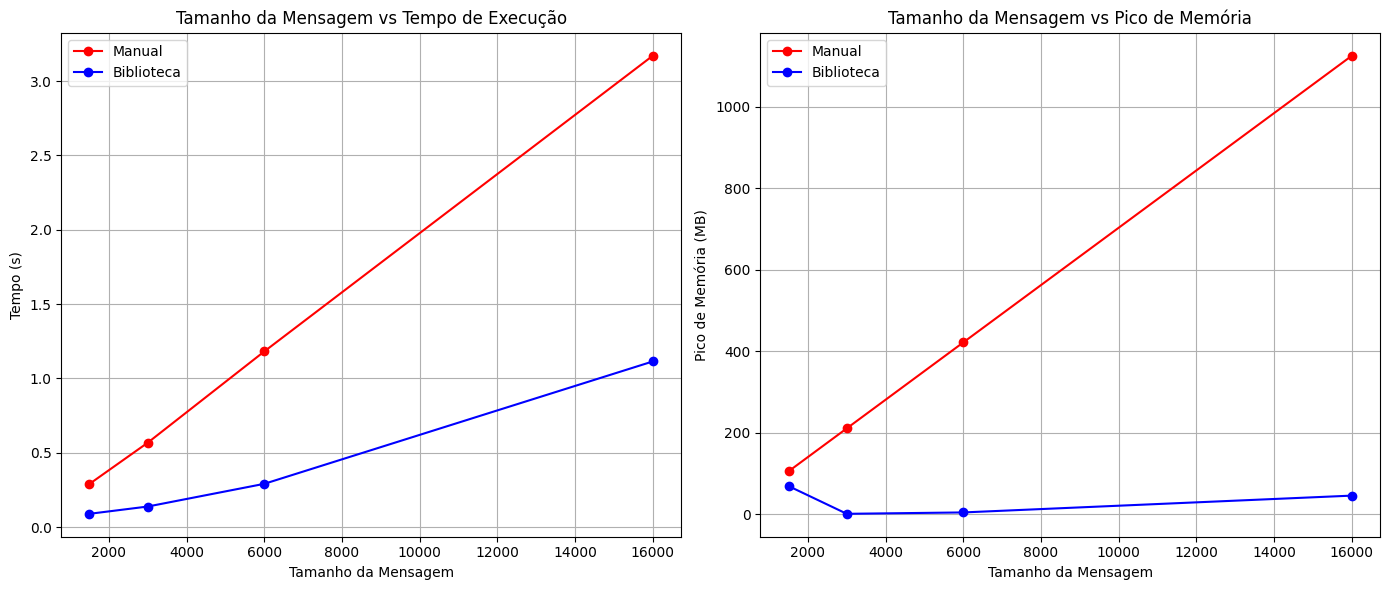

In [13]:
import matplotlib.pyplot as plt

# Dados fornecidos
dados = [
    {'tamanho': 1500, 'tempo_manual': 0.2908449210001436, 'mem_pico_manual': 105.7587890625, 'tempo_lib': 0.08997906999979932, 'mem_pico_lib': 69.7421875},
    {'tamanho': 3000, 'tempo_manual': 0.568084810000073, 'mem_pico_manual': 211.2275390625, 'tempo_lib': 0.13898194900002636, 'mem_pico_lib': 1.625},
    {'tamanho': 6000, 'tempo_manual': 1.1817625870000938, 'mem_pico_manual': 422.1650390625, 'tempo_lib': 0.2916615560000082, 'mem_pico_lib': 5.015625},
    {'tamanho': 16000, 'tempo_manual': 3.170205424999949, 'mem_pico_manual': 1125.2900390625, 'tempo_lib': 1.1145129369999722, 'mem_pico_lib': 46.267578125}
]

# Extração dos dados
tamanhos = [d['tamanho'] for d in dados]
tempos_manual = [d['tempo_manual'] for d in dados]
tempos_lib = [d['tempo_lib'] for d in dados]
mem_manual = [d['mem_pico_manual'] for d in dados]
mem_lib = [d['mem_pico_lib'] for d in dados]

# Criação dos gráficos
plt.figure(figsize=(14, 6))

# Gráfico 1: Tempo de Execução
plt.subplot(1, 2, 1)
plt.plot(tamanhos, tempos_manual, 'o-', label='Manual', color='red')
plt.plot(tamanhos, tempos_lib, 'o-', label='Biblioteca', color='blue')
plt.title('Tamanho da Mensagem vs Tempo de Execução')
plt.xlabel('Tamanho da Mensagem')
plt.ylabel('Tempo (s)')
plt.legend()
plt.grid(True)

# Gráfico 2: Pico de Memória
plt.subplot(1, 2, 2)
plt.plot(tamanhos, mem_manual, 'o-', label='Manual', color='red')
plt.plot(tamanhos, mem_lib, 'o-', label='Biblioteca', color='blue')
plt.title('Tamanho da Mensagem vs Pico de Memória')
plt.xlabel('Tamanho da Mensagem')
plt.ylabel('Pico de Memória (MB)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Análise interpretativa dos resultados:

A comparação mostra que a biblioteca é muito mais eficiente que a abordagem manual. O tempo de execução usando biblioteca foi sempre menor, mesmo com mensagens maiores. Além disso, o uso de memória foi drasticamente reduzido, especialmente em tamanhos como 3000 e 6000, onde a diferença foi enorme. A implementação manual parece desperdiçar recursos, talvez por estruturas mal otimizadas. Já a biblioteca usa algoritmos prontos e mais leves. No geral, a biblioteca teve melhor desempenho em todos os aspectos. Para aplicações reais, é claramente a melhor escolha.

# Parte 4

a. Para "Malu" (achei meu nome muito grande), o site convertbinary.com retornou a seguinte string de bits, que servirão de entrada:

01001101 01100001 01101100 01110101


b. Como minha matrícula é 123110614, usarei o CRC-16/ARC, com meu gerador pessoal sendo 10001000000100001

Para o cálculo do crc, temos:

In [36]:

mensagem_base = "01001101011000010110110001110101"
gerador = "10001000000100001"

crc = calcular_crc_manual(mensagem_base, gerador)
print(crc)


1001101100110100


Portanto:

Mensagem: Malu

Mensagem base: 01001101011000010110110001110101

CRC: 1001101100110100


In [37]:
def padrao_erro(pos, n_rajada, tamanho_quadro):
  prefixo_zero = '0' * pos
  rajada = '1' * n_rajada
  sufixo_zero = '0' * (tamanho_quadro - (pos + n_rajada))
  return prefixo_zero + rajada + sufixo_zero

In [38]:
from crc import Calculator, Crc16

mensagem_base = "01001101011000010110110001110101"
crc = "1001101100110100"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

#Erro na Posição 1, com rajada de 5 bits
padrao_erro_1 = padrao_erro(0,5,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)

print(padrao_erro_1)

print("TESTE 1: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib)

111110000000000000000000000000000000000000000000
TESTE 1: 
1001110011111110
56257


In [39]:
from crc import Calculator, Crc16

mensagem_base = "01001101011000010110110001110101"
crc = "1001101100110100"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

padrao_erro_1 = padrao_erro(1,10,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 2: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib)


011111111110000000000000000000000000000000000000
TESTE 2: 
1011101110010011
31326


In [40]:
from crc import Calculator, Crc16

mensagem_base = "01001101011000010110110001110101"
crc = "1001101100110100"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

padrao_erro_1 = padrao_erro(6,15,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 3: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib)

000000111111111111111000000000000000000000000000
TESTE 3: 
1000111011000001
9457


In [41]:
from crc import Calculator, Crc16

mensagem_base = "01001101011000010110110001110101"
crc = "1001101100110100"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

padrao_erro_1 = padrao_erro(8,20,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 4: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib)


000000001111111111111111111100000000000000000000
TESTE 4: 
1111001001011110
20720


In [42]:
from crc import Calculator, Crc16

mensagem_base = "01001101011000010110110001110101"
crc = "1001101100110100"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

padrao_erro_1 = padrao_erro(11,28,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 5: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib, "\n")


000000000001111111111111111111111111111000000000
TESTE 5: 
1101010110101101
58625 



In [44]:
from crc import Calculator, Crc16

mensagem_base = "01001101011000010110110001110101"
crc = "1001101100110100"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

padrao_erro_1 = padrao_erro(9,22,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 6: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib, "\n")

000000000111111111111111111111100000000000000000
TESTE 6: 
1100101110001111
19856 



In [45]:
from crc import Calculator, Crc16

mensagem_base = "01001101011000010110110001110101"
crc = "1001101100110100"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

padrao_erro_1 = padrao_erro(18,30,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 7: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib, "\n")


000000000000000000111111111111111111111111111111
TESTE 7: 
0010101001101011
63465 



In [46]:
from crc import Calculator, Crc16

mensagem_base = "01001101011000010110110001110101"
crc = "1001101100110100"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

padrao_erro_1 = padrao_erro(2,30,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 8: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib, "\n")

001111111111111111111111111111110000000000000000
TESTE 8: 
0011010011100000
23749 



In [47]:
from crc import Calculator, Crc16

mensagem_base = "01001101011000010110110001110101"
crc = "1001101100110100"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

padrao_erro_1 = padrao_erro(4,19,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 9: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib, "\n")

000011111111111111111110000000000000000000000000
TESTE 9: 
1010001010111011
24817 



In [49]:
from crc import Calculator, Crc16

mensagem_base = "01001101011000010110110001110101"
crc = "1001101100110100"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

padrao_erro_1 = padrao_erro(7,31,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 10: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib, "\n")

000000011111111111111111111111111111110000000000
TESTE 10: 
1100110101100011
33408 



Como ambas as implementações identificaram todos os erros, o  ponto cego não foi obtido.

Conclusão: Os resultados mostram que todos os 10 testes foram detectados por ambas as implementações (manual e biblioteca). Isso indica que, para os padrões de erro gerados aleatoriamente, o CRC-16/ARC demonstrou excelente capacidade de detecção, pelo menos para mensagens base pequenas. Entranto, uma vez que passou em todos os testes não significa que é infalível!
